# Логистическая регрессия

Создать модель классификации для предосказания того, есть ли у пациента признаки болезни сердца, в зависимости от физических характеристик этого человека (возраст, пол, холистерол и т.д.)

## Описание проекта

Данный проект направлен на создание модели классификации для предсказания наличия признаков заболевания сердца у пациента. Используя физические характеристики, такие как возраст, пол, уровень холестерина и другие данные, модель определяет вероятность наличия сердечного заболевания. Это помогает избежать дорогостоящих и инвазивных медицинских процедур.

## Данные

Набор данных включает 14 атрибутов, полученных в ходе физического тестирования пациентов. Данные содержат информацию о результатах медицинских тестов, таких как уровень холестерина, артериальное давление, максимальная частота пульса и другие. Основная цель — предсказать значение целевой переменной (target), которая указывает наличие или отсутствие заболевания сердца у пациента.

## Атрибуты:

```
•age: Возраст
•sex: Пол
•cp: Тип боли в груди (4 значения)
•trestbps: Давление в состоянии покоя (mm Hg)
•chol: Уровень холестерина (mg/dl)
•fbs: Уровень сахара в крови (больше 120 mg/dl)
•restecg: Результаты электрокардиограммы (0, 1, 2)
•thalach: Максимальный пульс
•exang: Возникновение ангины при физических упражнениях
•oldpeak: Пиковые значения в электрокардиограмме после упражнений
•slope: Наклон пикового значения электрокардиограммы
•ca: Количество крупных сосудов (0-3), окрашенных флуроскопией
•thal: Статус кровотока (3 = нормально, 6 = фиксированный дефект, 7 = обратимый дефект)
•target: Целевая переменная (0 — заболевания сердца нет, 1 — заболевание есть)
```

Источник: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## Оценка модели

Для оценки модели использовались следующие метрики:

```
•Confusion Matrix: Матрица ошибок для визуализации правильных и ошибочных предсказаний.
•Classification Report: Подробный отчет о точности, полноте и F1-мере для каждой из категорий.
```

## Визуализация коэффициентов

Создан график barplot для визуализации коэффициентов влияния признаков на целевую переменную. График отсортирован для наглядности.

## Заключение

Этот проект демонстрирует, как на основе данных о физических характеристиках пациентов можно предсказывать наличие заболевания сердца. Модель может использоваться в медицинской практике для предварительного скрининга пациентов и сокращения количества инвазивных процедур.

---

### Imports

**ЗАДАНИЕ: Выполните команду ниже, чтобы импортировать нужные библиотеки.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Данные

----

**ЗАДАЧА: Запустите ячейку ниже, чтобы прочитать файл с данными.**

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].unique()

array([1, 0])

### Анализ данных и визуализация данных

**ЗАДАНИЕ: Посмотрите, есть ли в наборе данных отсутствующие значения, и создайте статистический отчёт о числовых колонках, как показано ниже.**

In [5]:
# Напишите Ваш код здесь
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Напишите Ваш код здесь
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Задачи по визуализации данных

**ЗАДАНИЕ: Нарисуйте график bar plot, показывающий количество точек для каждого значения target.**

<Axes: xlabel='target', ylabel='count'>

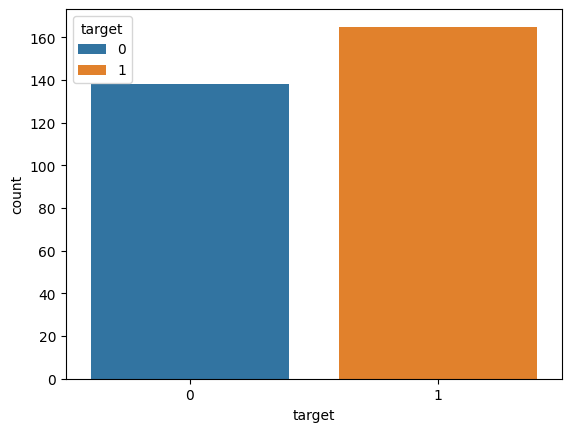

In [7]:
# Напишите Ваш код здесь
sns.countplot(data=df, x='target', hue='target')

**ЗАДАНИЕ: Нарисуйте график pairplot, показывающий связи между следующими колонками:**

    ['age','trestbps', 'chol','thalach','target']
   
*Замечание: если запустить pairplot по всем колонкам, то это заняло бы очень много времени, поскольку колонок много.*

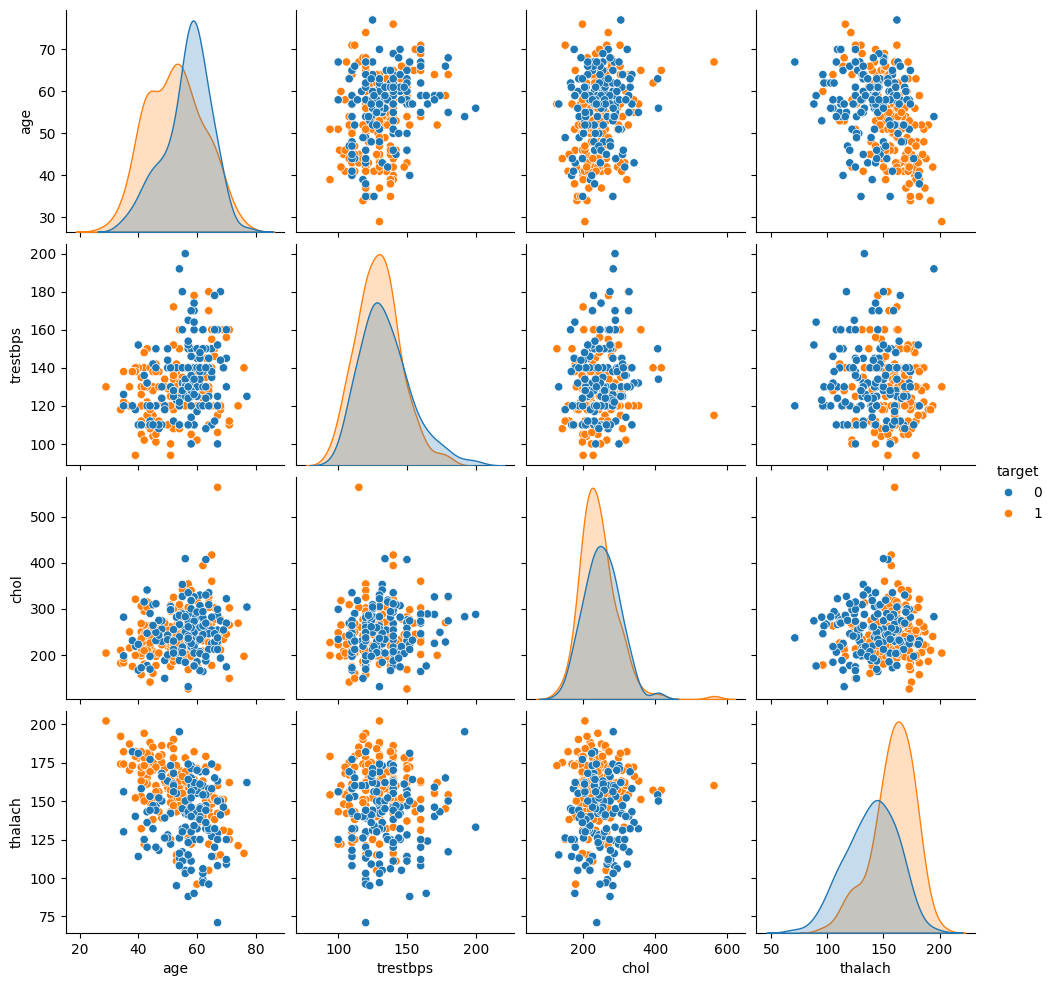

In [8]:
# Напишите Ваш код здесь
sns.pairplot(data=df, vars=['age','trestbps', 'chol','thalach'], hue='target')

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**ЗАДАНИЕ: Нарисуйте график heatmap, показывающий корреляции между всеми колонками.**

<Axes: >

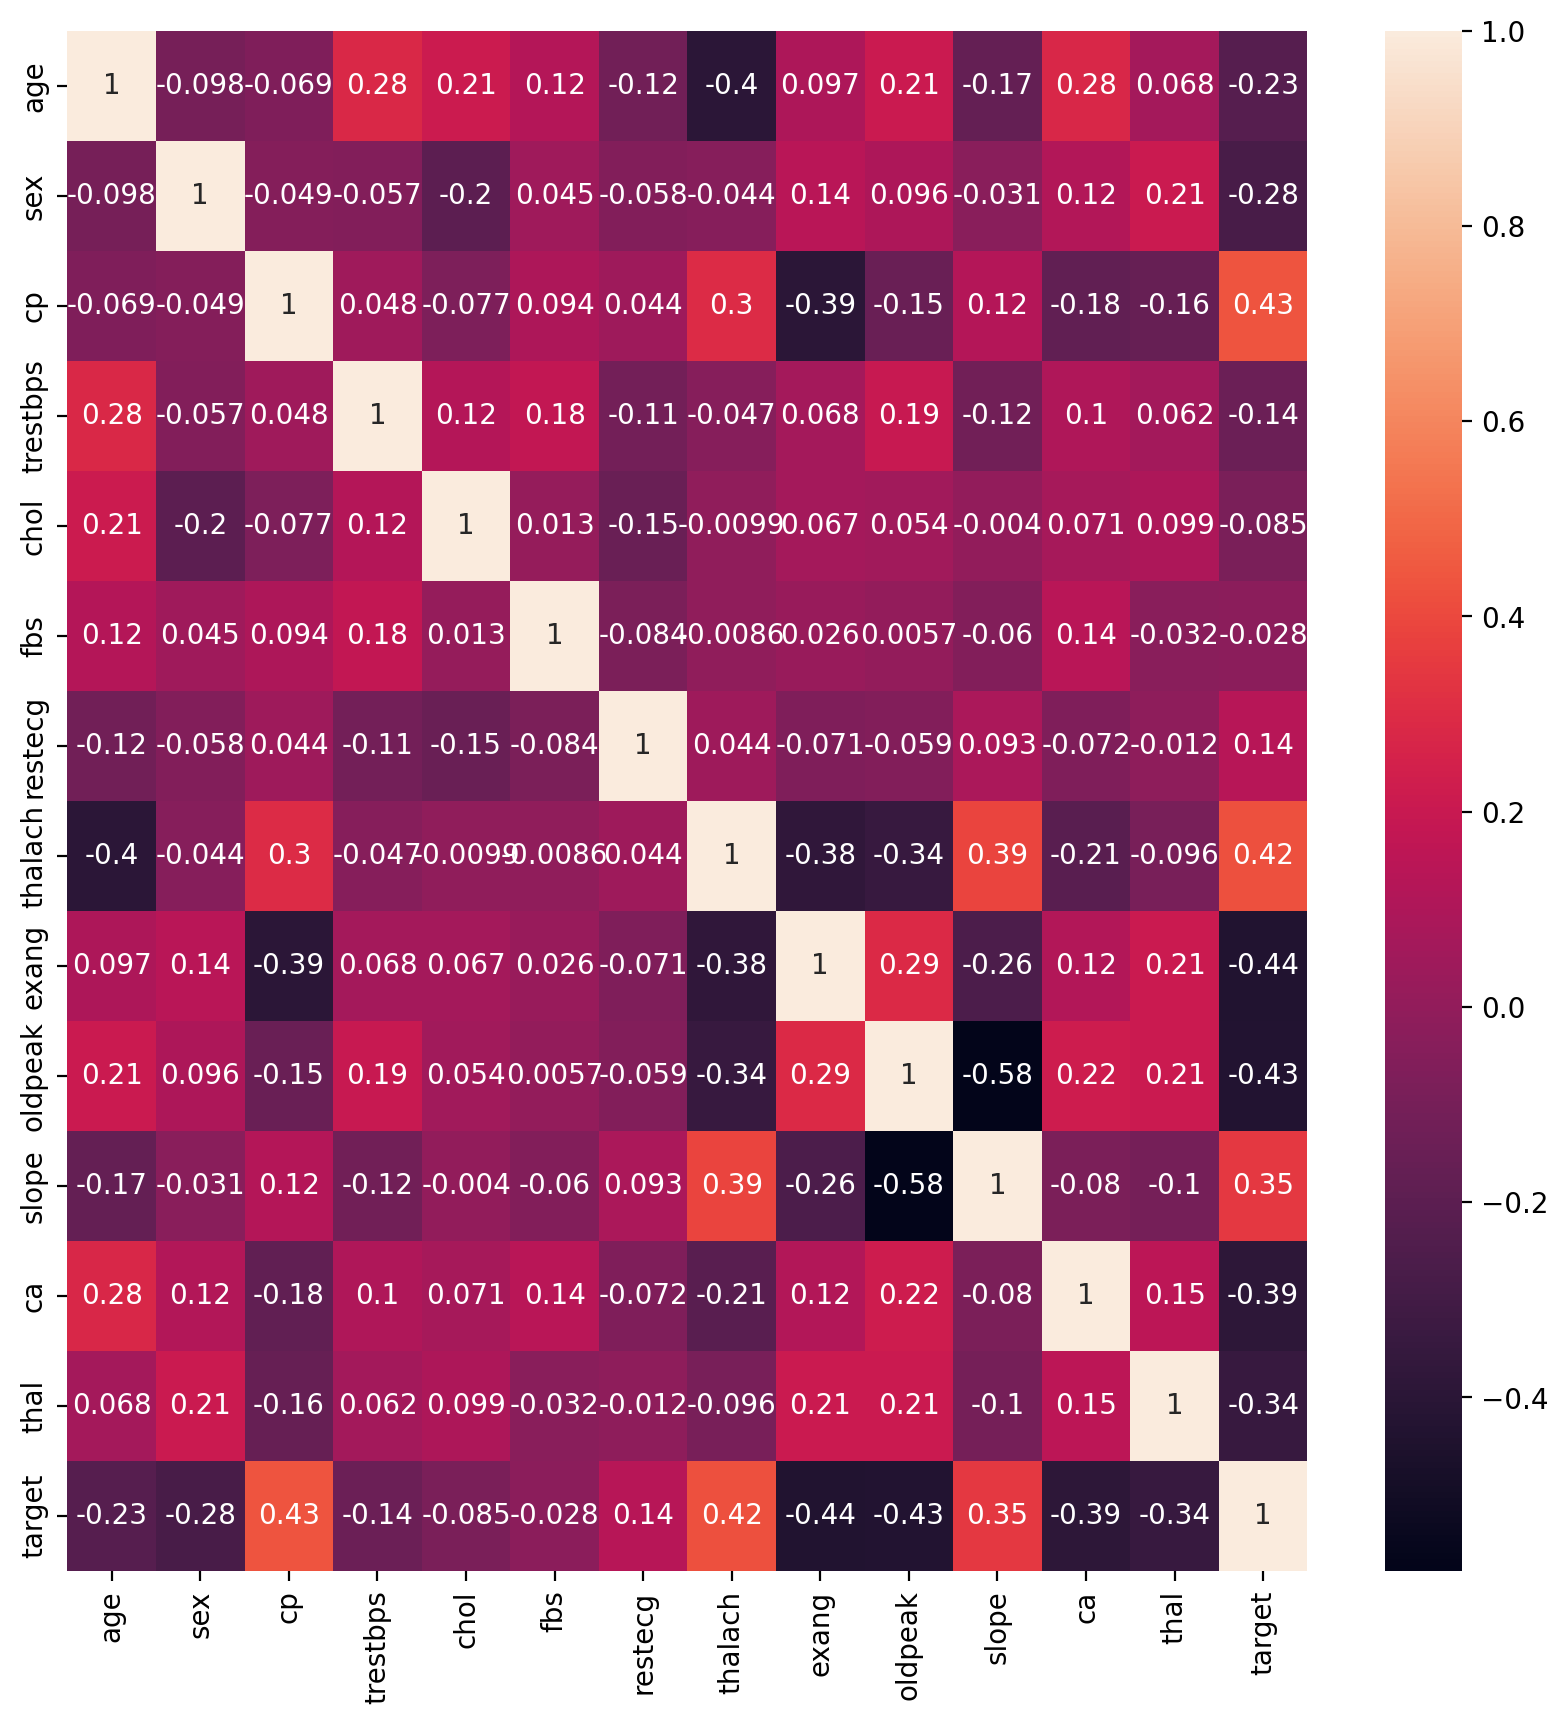

In [10]:
# Напишите Ваш код здесь
fig, ax = plt.subplots(figsize=(10, 10), dpi=200)
sns.heatmap(data=df.corr(), annot=True, ax=ax)

----
----

# Машинное обучение

## Разбиение на обучающий и тестовый наборы данных, а также масштабирование данных

**ЗАДАНИЕ: разделите все признаки на 2 объекта, X и y.**

In [11]:
# Напишите Ваш код здесь
X = df.drop('target', axis=1)

In [12]:
y = df['target']

**ЗАДАНИЕ: разбейте данные на обучающий и тестовый наборы данных. Для тестовых данных используйте размер 10% и значение random_state=101.**

In [13]:
# Напишите Ваш код здесь
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**ЗАДАНИЕ: С помощью объекта StandardScaler нормализуйте данные признаков в обучающем и тестовом наборах данных. При дальнейшем обучении модели убедитесь, что Вы проводите обучение только на обучающем наборе данных (без утечки данных из тестового набора данных).**

In [15]:
# Напишите Ваш код здесь
from  sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Модель логистической регрессии

**ЗАДАНИЕ: Создайте модель логистической регрессии, и с помощью кросс-валидации найдите хорошее значение значение C. У Вас здесь есть 2 варианта - либо *LogisticRegressionCV*, либо комбинация *LogisticRegression* и *GridSearchCV*. Выбор за Вами. В блокноте с решениями мы используем более простой способ с использованием *LogisticRegressionCV*.**

In [18]:
# Напишите Ваш код здесь
from sklearn.linear_model import LogisticRegressionCV

In [19]:
model = LogisticRegressionCV(solver='saga', cv=5)

In [20]:
model.fit(scaled_X_train, y_train)

LogisticRegressionCV(cv=5, solver='saga')

**ЗАДАНИЕ: Отобразите результаты поиска оптимальных параметров, особенно значение C.** 

*Замечание: Ваше значение может отличаться от найденного нами, поскольку оно зависит от метода поиска.*

In [21]:
# Напишите Ваш код здесь
model.C_

array([0.04641589])

### Коэффициенты

**ЗАДАНИЕ: Отобразите коэффициенты модели.**

In [22]:
model.coef_

array([[-0.09622564, -0.39461612,  0.53533422, -0.13850132, -0.08830994,
         0.0248754 ,  0.08081867,  0.2991477 , -0.33437473, -0.3523817 ,
         0.25100809, -0.49737528, -0.37448784]])

**БОНУСНОЕ ЗАДАНИЕ: Мы не показывали это в блокноте лекции, но у Вас есть все навыки, чтобы сделать это! Сделайте визуализацию коэффициентов, нарисуя их с помощью графика barplot. Дополнительно можете попробовать выяснить, как отсортировать график! Если что-то будет не получаться, то смело заглядывайте в блокнот с решениями - это можно сделать разными способами, в нашем решении мы используем комбинацию pandas и seaborn.**

In [23]:
# Напишите Ваш код здесь
coefs = pd.Series(index=X.columns, data=model.coef_[0]).sort_values()

In [24]:
coefs

ca         -0.497375
sex        -0.394616
thal       -0.374488
oldpeak    -0.352382
exang      -0.334375
trestbps   -0.138501
age        -0.096226
chol       -0.088310
fbs         0.024875
restecg     0.080819
slope       0.251008
thalach     0.299148
cp          0.535334
dtype: float64

<Axes: xlabel='None'>

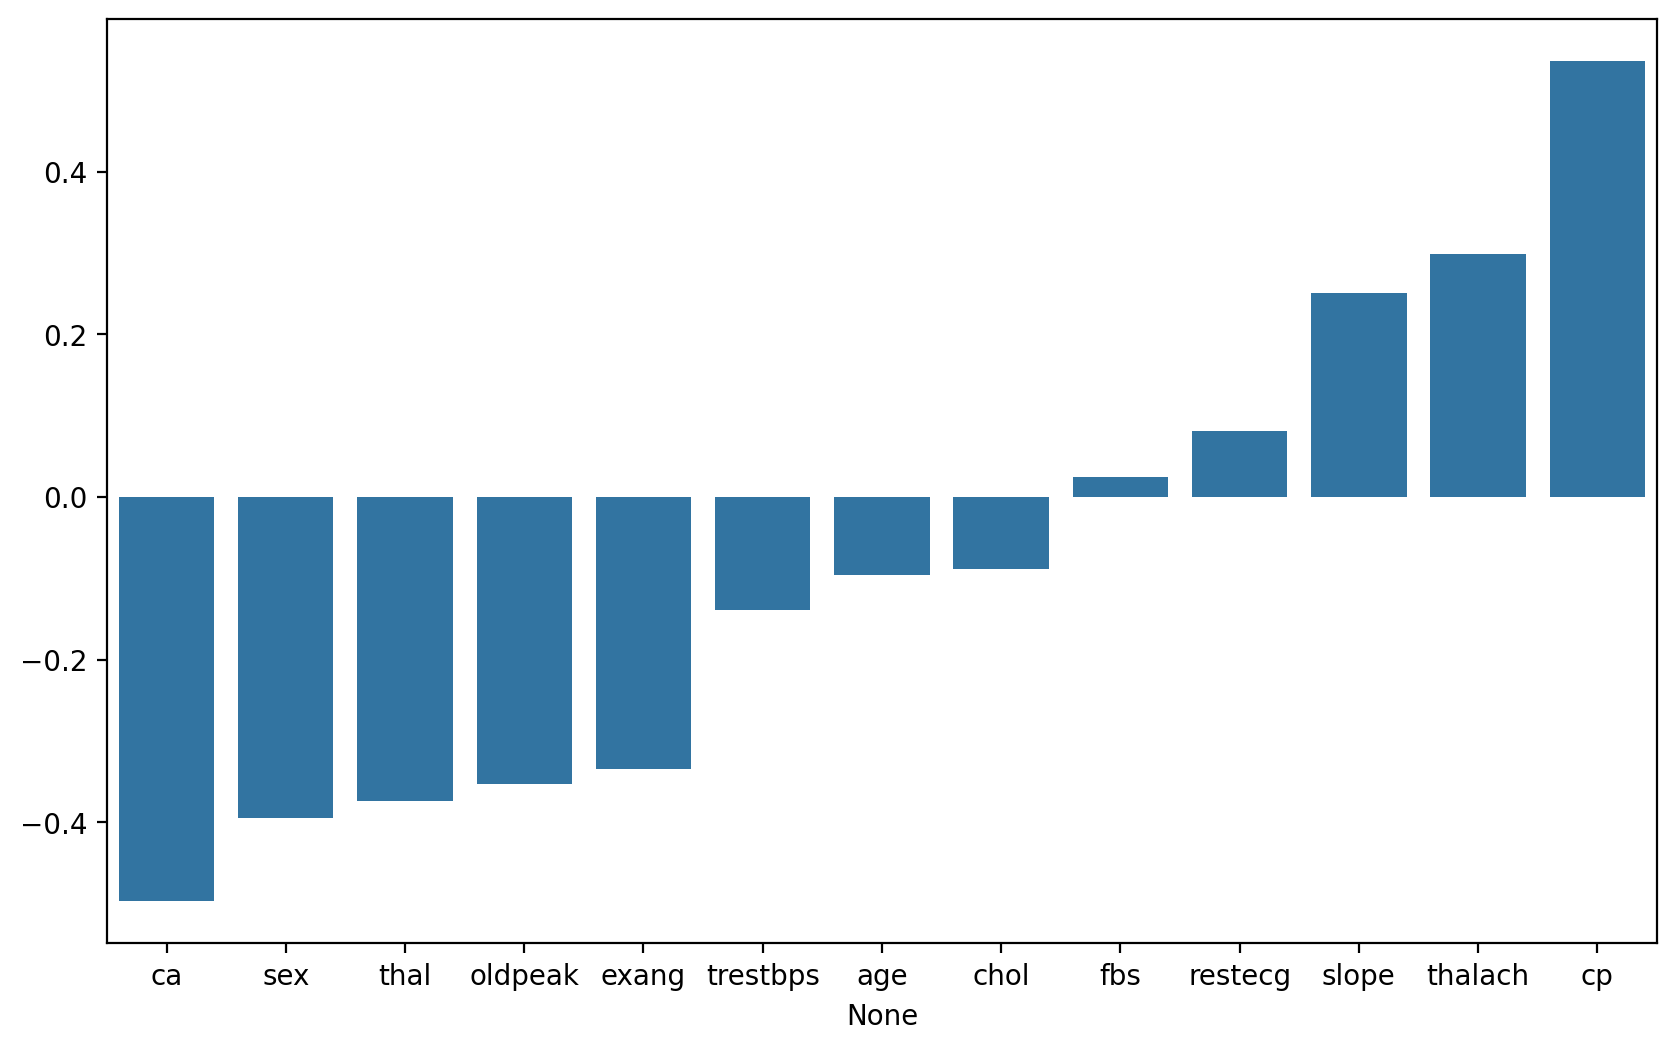

In [25]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)
sns.barplot(x=coefs.index, y=coefs.values, ax=ax)

---------

## Оценка модели

**ЗАДАНИЕ: Оцените работу модели на оставшихся 10% данных - тестовом наборе данных.**

**ЗАДАНИЕ: Подготовьте следующие оценки:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [26]:
# Напишите Ваш код здесь
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [27]:
y_pred = model.predict(scaled_X_test)

In [28]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]])

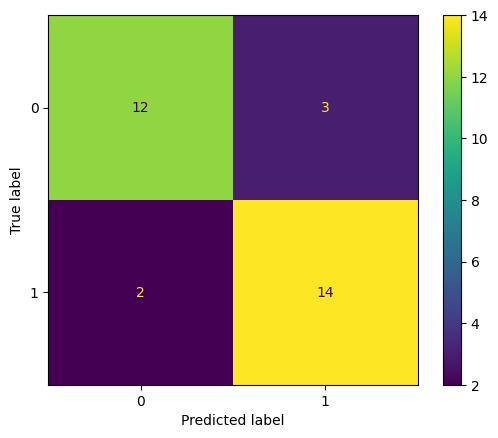

In [29]:
# Напишите Ваш код здесь
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [30]:
# Напишите Ваш код здесь
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Кривые производительности

**ЗАДАНИЕ: Нарисуйте графики "precision recall curve" и "ROC Curve".**

In [34]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc, PrecisionRecallDisplay, precision_recall_curve

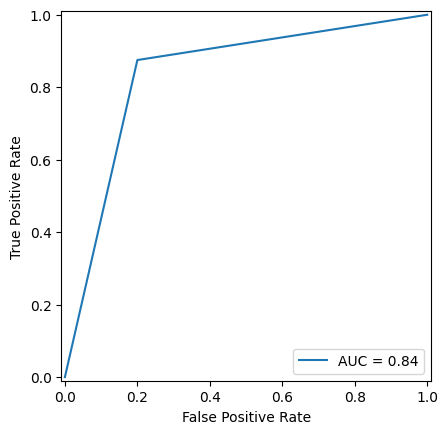

In [35]:
# Напишите Ваш код здесь
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

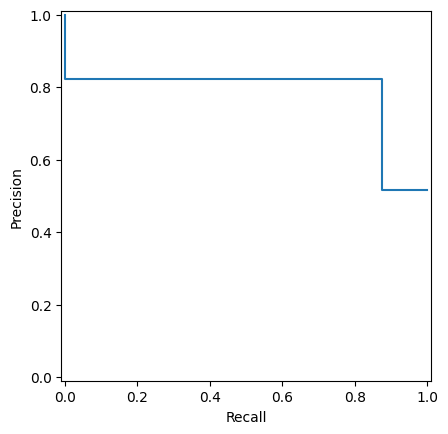

In [36]:
# Напишите Ваш код здесь
precision, recall, _ = precision_recall_curve(y_test, y_pred)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

**Финальное задание: В офис клиники пришёл пациент со следующими значениями признаков:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**ЗАДАНИЕ: Что предскажет Ваша модель для этого пациента? Есть ли здесь заболевание сердца? Насколько модель "уверена" в своём прогнозе?**

*Для Вашего удобства мы создали массив с указанными выше значениями:*

In [37]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [38]:
prediction = model.predict(scaler.transform(patient))

s:\Data\Coding\MachineLearning\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [39]:
prediction = model.predict(scaler.transform(patient))

s:\Data\Coding\MachineLearning\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
prediction

array([0])

## Отличная работа!

---